In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import seaborn as sns

# Mostrar imágenes dentro del notebook
%matplotlib inline

In [3]:
df_ampliado = pd.read_pickle('../Data/df_ampliado.pkl')

print("✅ Datos clínicos procesados cargados desde df_ampliado.pkl:")
display(df_ampliado.head())

✅ Datos clínicos procesados cargados desde df_ampliado.pkl:


,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,sex_F,sex_M,CEA,THBS
0,33.0,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,True,False,4.782685,48.496429
1,81.0,0,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000,True,False,3.577325,45.411236
2,51.0,0,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222,False,True,1.706278,36.507609
3,61.0,0,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222,False,True,2.597173,63.841839
4,62.0,0,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222,False,True,1.645906,46.779869


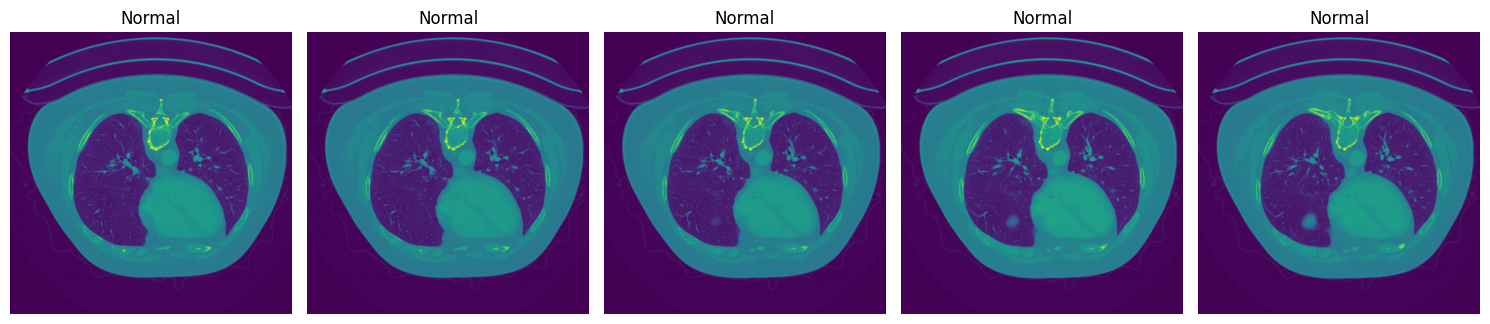

In [14]:
# Definir la carpeta con imágenes
image_dir = '../imagenes/DATASET/train'  # ruta a la carpeta test general

# Listar rutas de imágenes con clase
image_paths = []
labels = []

for label in ['normal', 'pancreatic_tumor']:
    folder = os.path.join(image_dir, label)
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            full_path = os.path.join(folder, filename)
            image_paths.append(full_path)
            labels.append(0 if label == 'normal' else 1)

df_images = pd.DataFrame({
    'image_path': image_paths,
    'label_image': labels
})
n = 5
fig, axs = plt.subplots(1, n, figsize=(15, 5))

for i in range(n):
    img_path = df_images.iloc[i]['image_path']
    label = df_images.iloc[i]['label_image']
    image = Image.open(img_path)
    axs[i].imshow(image)
    axs[i].set_title('Normal' if label == 0 else 'Tumor')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [15]:
import re

# Función para extraer el número del paciente desde el nombre del archivo
def extraer_id_paciente(path):
    filename = os.path.basename(path)
    match = re.match(r"(\d+)-\d+\.jpg", filename)
    if match:
        return int(match.group(1))
    else:
        return None

# Crear nueva columna 'id_paciente' en df_images
df_images['id_paciente'] = df_images['image_path'].apply(extraer_id_paciente)

print("✅ Imágenes con ID de paciente extraído:")
display(df_images.head())


✅ Imágenes con ID de paciente extraído:


,image_path,label_image,id_paciente
0,../imagenes/DATASET/train\normal\1-001.jpg,0,1.0
1,../imagenes/DATASET/train\normal\1-002.jpg,0,1.0
2,../imagenes/DATASET/train\normal\1-003.jpg,0,1.0
3,../imagenes/DATASET/train\normal\1-004.jpg,0,1.0
4,../imagenes/DATASET/train\normal\1-005.jpg,0,1.0


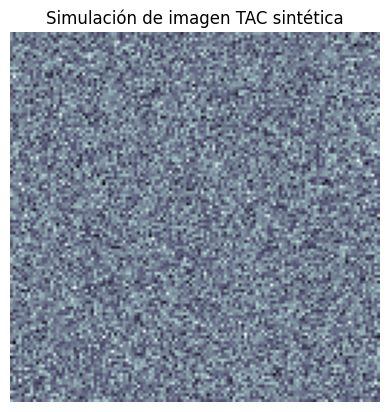

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simular_tac_sintetico(analisis):
    """
    Genera una imagen sintética simulando una TAC según algunos valores clínicos.
    Esto NO representa una imagen médica real, es solo para visualización.
    """
    seed = int(sum(analisis.values()) * 10) % 10000
    rng = np.random.default_rng(seed)

    imagen = rng.normal(loc=analisis['CA19-9'], scale=analisis['Bilirrubina'], size=(128, 128))
    imagen = np.clip(imagen, 0, 255)

    plt.imshow(imagen, cmap='bone')
    plt.title('Simulación de imagen TAC sintética')
    plt.axis('off')
    plt.show()

# Ejemplo de análisis clínico
analisis_ejemplo = {
    'CA19-9': 80,         # marcador tumoral
    'Bilirrubina': 2.1,   # bilirrubina total
    'Amilasa': 130        # otras variables no usadas acá pero posibles
}

simular_tac_sintetico(analisis_ejemplo)
